In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [307]:
df=pd.read_csv('Crop_recommendation.csv')

In [308]:
df.head(2999)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [309]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [310]:
df.shape

(2200, 8)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [312]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [313]:
len(df['label'].unique())

22

array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

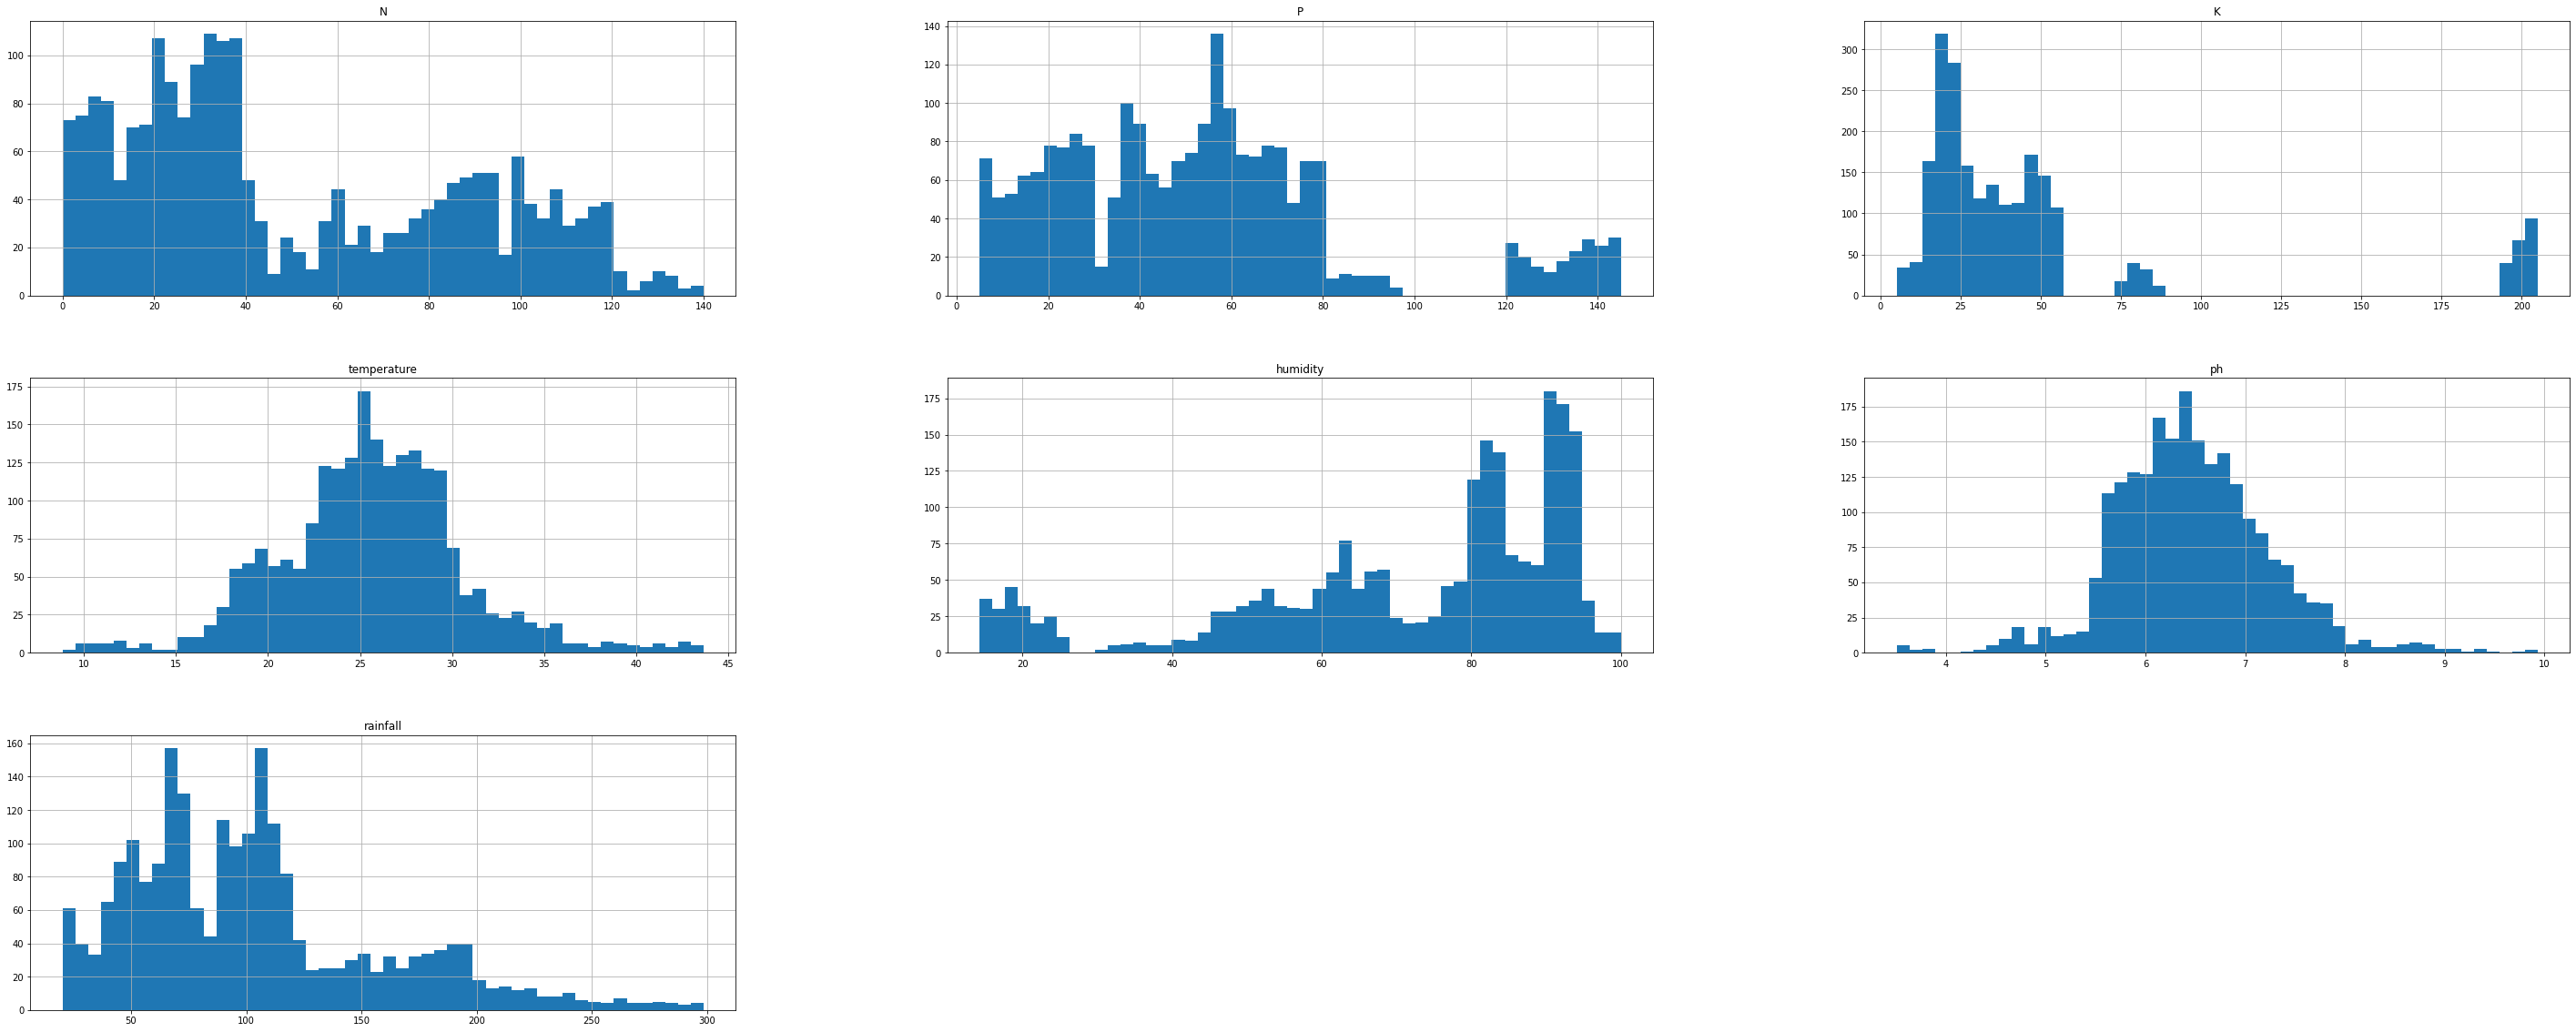

In [314]:
df.hist(bins=50,figsize=(50,20))

In [315]:
df['label'].value_counts()

jute           100
pomegranate    100
mothbeans      100
pigeonpeas     100
mungbean       100
muskmelon      100
coconut        100
papaya         100
kidneybeans    100
chickpea       100
mango          100
cotton         100
orange         100
blackgram      100
apple          100
coffee         100
watermelon     100
maize          100
rice           100
grapes         100
banana         100
lentil         100
Name: label, dtype: int64

In [316]:
from sklearn.preprocessing import LabelEncoder

In [317]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.head()
df['label'].value_counts()

0     100
2     100
19    100
17    100
15    100
13    100
11    100
9     100
7     100
5     100
3     100
1     100
20    100
18    100
16    100
14    100
12    100
10    100
8     100
6     100
4     100
21    100
Name: label, dtype: int64

In [318]:
from sklearn.model_selection import train_test_split

In [319]:
from sklearn.model_selection import cross_val_score

In [320]:
from sklearn.ensemble import VotingClassifier

In [321]:
from sklearn.preprocessing import StandardScaler


In [322]:
X=df[df.columns[:-1]]

In [323]:
y=df['label']

In [324]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [325]:
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=42)

In [326]:
sc=StandardScaler()

In [327]:
X_train=sc.fit_transform(X_train)
X_cv=sc.transform(X_cv)

In [328]:
from sklearn.linear_model import LogisticRegression

In [329]:
lr=LogisticRegression(penalty='l2',C=1.5,solver='lbfgs')

In [330]:
from sklearn.ensemble import RandomForestClassifier

In [331]:

rf=RandomForestClassifier(n_estimators=150)

In [332]:
from sklearn.neighbors import KNeighborsClassifier

In [333]:
knn=KNeighborsClassifier(n_neighbors=7)

In [334]:
from sklearn.svm import SVC

In [335]:
svc=SVC(kernel='rbf',C=1.5,gamma=0.5,probability=True)

In [336]:
v=VotingClassifier([('sc',svc),('knn',knn),('lr',lr),('rf',rf)])

In [337]:
v.fit(X_train,y_train)

c:\users\niranjan hegde\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('sc', SVC(C=1.5, gamma=0.5, probability=True)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('lr', LogisticRegression(C=1.5)),
                             ('rf', RandomForestClassifier(n_estimators=150))])

In [338]:
y_pred=v.predict(X_cv)

In [339]:
from sklearn.metrics import classification_report

In [340]:
print(classification_report(y_cv,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       0.93      0.96      0.94        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.81      1.00      0.89        34
           9       0.95      1.00      0.97        36
          10       0.85      1.00      0.92        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      0.91      0.95        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        25
          17       1.00    

In [341]:
y_actual=le.inverse_transform(y_pred)

In [342]:
y_actual

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'maize',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'rice',
       'pomegranate', 'lentil', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'lentil',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya',
       'pigeonpeas', 'orange', 'rice', 'muskmelon', 'pigeonpeas',
       'muskmelon', 'coconut', 'jute', 'banana', 'blackgram', 'papaya',
       'banana', 'cotton', 'watermelon', 'orange', 'coffee', 'chickpea',
 

In [343]:
a=np.array([[90,100,40,30.5,80.0,6.5,200]])

In [344]:
x=sc.transform(a)

In [345]:
y_pr=v.predict(x)

In [346]:
y_pr

array([1])

In [347]:
y_pr=le.inverse_transform(y_pr)

In [348]:
y_pr

array(['banana'], dtype=object)

In [349]:
import pickle

In [350]:
output = open('Crop_label_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

In [351]:
model=open("votingclassfier.pkl",'wb')

In [352]:
pickle.dump(v,model)
model.close()

In [353]:
standarscaler=open("stdscaler.pkl",'wb')
pickle.dump(sc,standarscaler)

In [354]:
standarscaler.close()

In [355]:
rdd=np.array([1,2,3,4,5,6,7,8,9,10])
rdd1=np.array([7,6,5,4,5,6,7,8,9,10])

In [356]:
np.corrcoef(rdd,rdd1)

array([[1.        , 0.70927291],
       [0.70927291, 1.        ]])

In [357]:
np.cov(rdd,rdd1)

array([[9.16666667, 4.05555556],
       [4.05555556, 3.56666667]])

In [358]:
import pickle
import numpy as np

In [359]:
std= pickle.load(open('stdscaler.pkl', 'rb'))
a=np.array([[90,41,43,22.79,85.005,6.8,201.9]])
a=std.transform(a)

In [360]:
a

array([[ 1.03466348, -0.37244606, -0.10449834, -0.5500715 ,  0.60595029,
         0.42271719,  1.79626154]])

In [361]:
import tensorflow as tf

In [362]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [363]:
tf.debugging.set_log_device_placement(True)


In [364]:
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [365]:
from tensorflow import keras

In [366]:
from keras.models import Sequential
from keras.layers import Dense

In [367]:
X_train

array([[-8.14149162e-01, -8.22608476e-01, -4.17586751e-01, ...,
        -1.10914730e+00, -1.00850068e+00, -1.14762954e-01],
       [-5.99794073e-01, -5.52511028e-01, -3.98018725e-01, ...,
        -8.39738838e-01,  6.40463882e-01, -2.12947619e-01],
       [ 2.30831896e-01, -2.82413580e-01, -4.95858854e-01, ...,
        -8.13537964e-02, -9.78595756e-01, -4.59356367e-01],
       ...,
       [-1.08209302e+00, -5.22500201e-01, -3.39314648e-01, ...,
        -9.20572349e-01,  6.00471872e-04, -3.53408620e-02],
       [-1.08209302e+00,  2.11845263e+00,  3.04595380e+00, ...,
         3.79045864e-01, -1.48070939e-01, -5.55371242e-01],
       [-5.19410914e-01,  7.37954558e-01, -5.15426879e-01, ...,
        -4.34666852e-01,  6.91994073e-01, -8.79579938e-01]])

In [368]:
model=Sequential()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [369]:
model.add(Dense(9,input_dim=7,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(22,activation='sigmoid'))

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica

In [370]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [371]:
y_train=y_train.to_numpy()

In [372]:


type(y_train)

#y_train.reshape(1540,1)

numpy.ndarray

In [373]:
y_train=tensorflow.keras.utils.to_categorical(y_train, 22)
#y_cv=tensorflow.keras.utils.to_categorical(y_cv, 22)


In [374]:
model.fit(X_train,y_train,epochs=100,batch_size=5)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapData

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/308 [>.............................] - ETA: 1s - loss: 3.0413 - accuracy: 0.0933      Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/devic

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 95/308 [========>.....................] - ETA: 0s - loss: 3.0148 - accuracy: 0.1116Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
172/308 [===============>..............] - ETA: 0s - loss: 2.9582 - accuracy: 0.1360Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
249/308 [=======================>......] - ETA: 0s - loss: 2.9169 - accuracy: 0.1357Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
243/308 [======================>.......] - ETA: 0s - loss: 2.6053 - accuracy: 0.17

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 3/100
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/308 [..............................] - ETA: 0s - loss: 2.1049 - accuracy: 0.0000e+00Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 75/308 [======>.......................] - ETA: 0s - loss: 2.3364 - accuracy: 0.2213Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
227/308 [=====================>........] - ETA: 0s - loss: 2.2599 - accuracy: 0.2599Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
304/308 [============================>.] - ETA: 0s - loss: 2.2121 - accuracy: 0.2658Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 3ms/step - loss: 2.2107 - accuracy: 0.2643
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 70/308 [=====>........................] - ETA: 0s - loss: 1.9364 - accuracy: 0.2857Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

218/308 [====================>.........] - ETA: 0s - loss: 1.8163 - accuracy: 0.3321Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
298/308 [============================>.] - ETA: 0s - loss: 1.7573 - accuracy: 0.3463Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
213/308 [===================>..........] - ETA: 0s - loss: 1.3915 - accuracy: 0.5352Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
294/308 [===========================>..] - ETA: 0s - loss: 1.3527 - accuracy: 0.5483Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

 49/308 [===>..........................] - ETA: 0s - loss: 1.1449 - accuracy: 0.6653Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
131/308 [===========>..................] - ETA: 0s - loss: 1.1545 - accuracy: 0.6458Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
206/308 [===================>..........] - ETA: 0s - loss: 1.1381 - accuracy: 0.6515Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
287/308 [==========================>...] - ETA: 0s - loss: 1.1128 - accuracy: 0.65

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/308 [===>..........................] - ETA: 0s - loss: 0.9341 - accuracy: 0.6667Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
273/308 [=========================>....] - ETA: 0s - loss: 0.9573 - accuracy: 0.6916Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/308 [==>...........................] - ETA: 0s - loss: 0.9044 - accuracy: 0.7059Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
116/308 [==========>...................] - ETA: 0s - loss: 0.8793 - accuracy: 0.7310Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/308 [==>...........................] - ETA: 0s - loss: 0.8049 - accuracy: 0.78

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
260/308 [========================>.....] - ETA: 0s - loss: 0.7696 - accuracy: 0.7523Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

 18/308 [>.............................] - ETA: 0s - loss: 0.8262 - accuracy: 0.7111Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 98/308 [========>.....................] - ETA: 0s - loss: 0.7054 - accuracy: 0.7571Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

249/308 [=======================>......] - ETA: 0s - loss: 0.7137 - accuracy: 0.7639Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/308 [>.............................] - ETA: 1s - loss: 0.7167 - accuracy: 0.7375Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
246/308 [======================>.......] - ETA: 0s - loss: 0.6504 - accuracy: 0.7756Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Epoch 12/100
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/308 [..............................] - ETA: 1s - loss: 0.3106 - accuracy: 1.0000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:

 77/308 [======>.......................] - ETA: 0s - loss: 0.6326 - accuracy: 0.7740Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
155/308 [==============>...............] - ETA: 0s - loss: 0.6115 - accuracy: 0.7961Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

230/308 [=====================>........] - ETA: 0s - loss: 0.6156 - accuracy: 0.8000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 3ms/step - loss: 0.6167 - accuracy: 0.7909
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 13/100
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/308 [.........................

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 3ms/step - loss: 0.5823 - accuracy: 

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 64/308 [=====>........................] - ETA: 0s - loss: 0.5412 - accuracy: 0.7969Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
145/308 [=============>................] - ETA: 0s - loss: 0.5695 - accuracy: 0.7848Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

130/308 [===========>..................] - ETA: 0s - loss: 0.5416 - accuracy: 0.8092Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
209/308 [===================>..........] - ETA: 0s - loss: 0.5352 - accuracy: 0.8067Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
290/308 [===========================>..] - ETA: 0s - loss: 0.5203 - accuracy: 0.8200Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 49/308 [===>..........................] - ETA: 0s - loss: 0.4974 - accuracy: 0.8082Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
129/308 [===========>..................] - ETA: 0s - loss: 0.5066 - accuracy: 0.8140Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
116/308 [==========>...................] - ETA: 0s - loss: 0.4906 - accuracy: 0.8310Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
197/308 [==================>...........] - ETA: 0s - loss: 0.4771 - accuracy: 0.8396Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/308 [==>...........................] - ETA: 0s - loss: 0.4677 - accuracy: 0.8121Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
116/308 [==========>...................] - ETA: 0s - loss: 0.4412 - accuracy: 0.8414Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

263/308 [========================>.....] - ETA: 0s - loss: 0.4545 - accuracy: 0.8471Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

178/308 [================>.............] - ETA: 0s - loss: 0.4204 - accuracy: 0.8596Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
259/308 [========================>.....] - ETA: 0s - loss: 0.4299 - accuracy: 0.8525Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/308 [>.............................] - ETA: 0s - loss: 0.4851 - accuracy: 0.8111Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
101/308 [========>.....................] - ETA: 0s - loss: 0.4373 - accuracy: 0.8436Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

248/308 [=======================>......] - ETA: 0s - loss: 0.4186 - accuracy: 0.8532Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/308 [>.............................] - ETA: 0s - loss: 0.3018 - accuracy: 0.9176Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
167/308 [===============>..............] - ETA: 0s - loss: 0.4055 - accuracy: 0.8479Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
249/308 [=======================>......] - ETA: 0s - loss: 0.4085 - accuracy: 0.8530Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/308 [======>.......................] - ETA: 0s - loss: 0.4066 - accuracy: 0.8585Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
160/308 [==============>...............] - ETA: 0s - loss: 0.3847 - accuracy: 0.8675Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
238/308 [======================>.......] - ETA: 0s - loss: 0.3805 - accuracy: 0.8748Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 23/100
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/308 [..............................] - ETA: 1s - loss: 0.6561 - accuracy: 0.6000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

150/308 [=============>................] - ETA: 0s - loss: 0.3776 - accuracy: 0.8747Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
232/308 [=====================>........] - ETA: 0s - loss: 0.3738 - accuracy: 0.8767Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 3ms/step - loss: 0.3751 - accuracy: 0.8714
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executin

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 69/308 [=====>........................] - ETA: 0s - loss: 0.3834 - accuracy: 0.8551Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
151/308 [=============>................] - ETA: 0s - loss: 0.3686 - accuracy: 0.87

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
298/308 [============================>.] - ETA: 0s - loss: 0.3649 - accuracy: 0.8732Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 62/308 [=====>........................] - ETA: 0s - loss: 0.4019 - accuracy: 0.8548Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
142/308 [============>.................] - ETA: 0s - loss: 0.3673 - accuracy: 0.8746Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
219/308 [====================>.........] - ETA: 0s - loss: 0.3631 - accuracy: 0.8721Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
132/308 [===========>..................] - ETA: 0s - loss: 0.3599 - accuracy: 0.8682Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
207/308 [===================>..........] - ETA: 0s - loss: 0.3529 - accuracy: 0.8715Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
290/308 [===========================>..] - ETA: 0s - loss: 0.3449 - accuracy: 0.8793Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 48/308 [===>..........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8875Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
124/308 [===========>..................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8935Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
200/308 [==================>...........] - ETA: 0s - loss: 0.3335 - accuracy: 0.8860Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
280/308 [==========================>...] - ETA: 0s - loss: 0.3327 - accuracy: 0.8886Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
191/308 [=================>............] - ETA: 0s - loss: 0.3256 - accuracy: 0.8827Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
273/308 [=========================>....] - ETA: 0s - loss: 0.3259 - accuracy: 0.8864Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/308 [==>...........................] - ETA: 0s - loss: 0.3981 - accuracy: 0.8250Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
113/308 [==========>...................] - ETA: 0s - loss: 0.3397 - accuracy: 0.8850Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

258/308 [========================>.....] - ETA: 0s - loss: 0.3247 - accuracy: 0.8922Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 97/308 [========>.....................] - ETA: 0s - loss: 0.3221 - accuracy: 0.8804Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
177/308 [================>.............] - ETA: 0s - loss: 0.3140 - accuracy: 0.8802Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/308 [>.............................] - ETA: 1s - loss: 0.3005 - accuracy: 0.8933Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 94/308 [========>.....................] - ETA: 0s - loss: 0.3070 - accuracy: 0.8979Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
174/308 [===============>..............] - ETA: 0s - loss: 0.3002 - accuracy: 0.8977Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

158/308 [==============>...............] - ETA: 0s - loss: 0.2844 - accuracy: 0.8987Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
237/308 [======================>.......] - ETA: 0s - loss: 0.2814 - accuracy: 0.9038Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 33/100
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/308 [..............................] - ETA: 1s - loss: 0.4111 - accuracy: 1.0000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

151/308 [=============>................] - ETA: 0s - loss: 0.2833 - accuracy: 0.9020Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
233/308 [=====================>........] - ETA: 0s - loss: 0.2791 - accuracy: 0.9082Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

304/308 [============================>.] - ETA: 0s - loss: 0.2837 - accuracy: 0.9046Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 3ms/step - loss: 0.2818 - accuracy: 0.9052
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 73/308 [======>.......................] - ETA: 0s - loss: 0.2563 - accuracy: 0.90

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
223/308 [====================>.........] - ETA: 0s - loss: 0.2689 - accuracy: 0.9103Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
303/308 [============================>.] - ETA: 0s - loss: 0.2734 - accuracy: 0.9096Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 66/308 [=====>........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.88

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

289/308 [===========================>..] - ETA: 0s - loss: 0.2698 - accuracy: 0.9073Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
129/308 [===========>..................] - ETA: 0s - loss: 0.2737 - accuracy: 0.9023Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
210/308 [===================>..........] - ETA: 0s - loss: 0.2659 - accuracy: 0.9086Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 47/308 [===>..........................] - ETA: 0s - loss: 0.2567 - accuracy: 0.8979Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
126/308 [===========>..................] - ETA: 0s - loss: 0.2591 - accuracy: 0.9048Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

 35/308 [==>...........................] - ETA: 0s - loss: 0.1877 - accuracy: 0.9486Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
119/308 [==========>...................] - ETA: 0s - loss: 0.2372 - accuracy: 0.9193Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
271/308 [=========================>....] - ETA: 0s - loss: 0.2503 - accuracy: 0.9151Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/308 [==>...........................] - ETA: 0s - loss: 0.2563 - accuracy: 0.9000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

183/308 [================>.............] - ETA: 0s - loss: 0.2509 - accuracy: 0.9115Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
267/308 [=========================>....] - ETA: 0s - loss: 0.2407 - accuracy: 0.9161Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
102/308 [========>.....................] - ETA: 0s - loss: 0.2619 - accuracy: 0.8863Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
184/308 [================>.............] - ETA: 0s - loss: 0.2317 - accuracy: 0.9109Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/308 [>.............................] - ETA: 0s - loss: 0.2138 - accuracy: 0.9333Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
250/308 [=======================>......] - ETA: 0s - loss: 0.2391 - accuracy: 0.9152Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
167/308 [===============>..............] - ETA: 0s - loss: 0.2382 - accuracy: 0.9126Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
247/308 [=======================>......] - ETA: 0s - loss: 0.2276 - accuracy: 0.9231Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

  1/308 [..............................] - ETA: 1s - loss: 0.3056 - accuracy: 0.8000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 84/308 [=======>......................] - ETA: 0s - loss: 0.1991 - accuracy: 0.9333Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

233/308 [=====================>........] - ETA: 0s - loss: 0.2182 - accuracy: 0.9288Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 44/100
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/308 [..............................] - ETA: 0s - loss: 0.2843 - accuracy: 1.0000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __in

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
151/308 [=============>................] - ETA: 0s - loss: 0.2101 - accuracy: 0.9338Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
234/308 [=====================>........] - ETA: 0s - loss: 0.2244 - accuracy: 0.9222Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 3ms/step - loss: 0.2159 - accuracy: 0.9273
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/devi

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 68/308 [=====>........................] - ETA: 0s - loss: 0.2108 - accuracy: 0.9118Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
151/308 [=============>................] - ETA: 0s - loss: 0.2070 - accuracy: 0.92

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
302/308 [============================>.] - ETA: 0s - loss: 0.2104 - accuracy: 0.9245Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

212/308 [===================>..........] - ETA: 0s - loss: 0.2141 - accuracy: 0.9302Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
296/308 [===========================>..] - ETA: 0s - loss: 0.2096 - accuracy: 0.9331Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 52/308 [====>.........................] - ETA: 0s - loss: 0.2023 - accuracy: 0.9346Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
134/308 [============>.................] - ETA: 0s - loss: 0.2003 - accuracy: 0.9328Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

283/308 [==========================>...] - ETA: 0s - loss: 0.2009 - accuracy: 0.9251Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 49/308 [===>..........................] - ETA: 0s - loss: 0.1842 - accuracy: 0.9469Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

198/308 [==================>...........] - ETA: 0s - loss: 0.1952 - accuracy: 0.9364Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
281/308 [==========================>...] - ETA: 0s - loss: 0.1962 - accuracy: 0.9345Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
116/308 [==========>...................] - ETA: 0s - loss: 0.1725 - accuracy: 0.9414Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
199/308 [==================>...........] - ETA: 0s - loss: 0.1863 - accuracy: 0.9347Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/308 [==>...........................] - ETA: 0s - loss: 0.1702 - accuracy: 0.9412Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
115/308 [==========>...................] - ETA: 0s - loss: 0.1747 - accuracy: 0.9374Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
264/308 [========================>.....] - ETA: 0s - loss: 0.1882 - accuracy: 0.9303Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/308 [==>...........................] - ETA: 0s - loss: 0.2005 - accuracy: 0.93

100/308 [========>.....................] - ETA: 0s - loss: 0.1799 - accuracy: 0.9420Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
181/308 [================>.............] - ETA: 0s - loss: 0.1929 - accuracy: 0.9304Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/308 [>.............................] - ETA: 0s - loss: 0.1827 - accuracy: 0.9333Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
101/308 [========>.....................] - ETA: 0s - loss: 0.1901 - accuracy: 0.9287Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
255/308 [=======================>......] - ETA: 0s - loss: 0.1864 - accuracy: 0.9365Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/308 [>.............................] - ETA: 0s - loss: 0.1789 - accuracy: 0.91

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
166/308 [===============>..............] - ETA: 0s - loss: 0.1831 - accuracy: 0.9349Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
249/308 [=======================>......] - ETA: 0s - loss: 0.1804 - accuracy: 0.9373Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 82/308 [======>.......................] - ETA: 0s - loss: 0.1686 - accuracy: 0.9415Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
165/308 [===============>..............] - ETA: 0s - loss: 0.1816 - accuracy: 0.9321Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 55/100
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/308 [..............................] - ETA: 1s - loss: 0.0092 - accuracy: 1.0000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
155/308 [==============>...............] - ETA: 0s - loss: 0.1770 - accuracy: 0.9406Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
234/308 [=====================>........] - ETA: 0s - loss: 0.1759 - accuracy: 0.9427Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

303/308 [============================>.] - ETA: 0s - loss: 0.1725 - accuracy: 0.9406Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 4ms/step - loss: 0.1716 - accuracy: 0.9409
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 65/308 [=====>........................] - ETA: 0s - loss: 0.1594 - accuracy: 0.9477Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
143/308 [============>.................] - ETA: 0s - loss: 0.1627 - accuracy: 0.9441Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
224/308 [====================>.........] - ETA: 0s - loss: 0.1665 - accuracy: 0.9438Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 64/308 [=====>........................] - ETA: 0s - loss: 0.1421 - accuracy: 0.95

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

210/308 [===================>..........] - ETA: 0s - loss: 0.1568 - accuracy: 0.9467Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
295/308 [===========================>..] - ETA: 0s - loss: 0.1633 - accuracy: 0.9403Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 52/308 [====>.........................] - ETA: 0s - loss: 0.1982 - accuracy: 0.9192Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
133/308 [===========>..................] - ETA: 0s - loss: 0.1637 - accuracy: 0.9414Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/308 [===>..........................] - ETA: 0s - loss: 0.1390 - accuracy: 0.9524Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
277/308 [=========================>....] - ETA: 0s - loss: 0.1591 - accuracy: 0.9480Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/308 [==>...........................] - ETA: 0s - loss: 0.1592 - accuracy: 0.9588Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

107/308 [=========>....................] - ETA: 0s - loss: 0.1465 - accuracy: 0.9533Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
187/308 [=================>............] - ETA: 0s - loss: 0.1474 - accuracy: 0.9529Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
264/308 [========================>.....] - ETA: 0s - loss: 0.1516 - accuracy: 0.9500Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

 99/308 [========>.....................] - ETA: 0s - loss: 0.1409 - accuracy: 0.9495Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
180/308 [================>.............] - ETA: 0s - loss: 0.1509 - accuracy: 0.9456Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/308 [>.............................] - ETA: 0s - loss: 0.1316 - accuracy: 0.9789Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 98/308 [========>.....................] - ETA: 0s - loss: 0.1528 - accuracy: 0.9531Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

 85/308 [=======>......................] - ETA: 0s - loss: 0.1527 - accuracy: 0.9388Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
168/308 [===============>..............] - ETA: 0s - loss: 0.1542 - accuracy: 0.9429Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
248/308 [=======================>......] - ETA: 0s - loss: 0.1464 - accuracy: 0.95

  1/308 [..............................] - ETA: 0s - loss: 0.0453 - accuracy: 1.0000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 84/308 [=======>......................] - ETA: 0s - loss: 0.1342 - accuracy: 0.9571Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 65/100
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/308 [..............................] - ETA: 1s - loss: 0.1120 - accuracy: 1.0000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __in

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

149/308 [=============>................] - ETA: 0s - loss: 0.1395 - accuracy: 0.9570Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
233/308 [=====================>........] - ETA: 0s - loss: 0.1380 - accuracy: 0.9562Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 3ms/step - loss: 0.1384 - accuracy: 0.9552
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/devi

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 69/308 [=====>........................] - ETA: 0s - loss: 0.1487 - accuracy: 0.9594Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

220/308 [====================>.........] - ETA: 0s - loss: 0.1428 - accuracy: 0.9491Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
304/308 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9539Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 66/308 [=====>........................] - ETA: 0s - loss: 0.1169 - accuracy: 0.9576Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
214/308 [===================>..........] - ETA: 0s - loss: 0.1256 - accuracy: 0.9626Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
298/308 [============================>.] - ETA: 0s - loss: 0.1327 - accuracy: 0.9611Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

 51/308 [===>..........................] - ETA: 0s - loss: 0.1142 - accuracy: 0.9569Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
134/308 [============>.................] - ETA: 0s - loss: 0.1349 - accuracy: 0.9478Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
285/308 [==========================>...] - ETA: 0s - loss: 0.1328 - accuracy: 0.9509Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 50/308 [===>..........................] - ETA: 0s - loss: 0.1168 - accuracy: 0.9640Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
202/308 [==================>...........] - ETA: 0s - loss: 0.1223 - accuracy: 0.9663Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
119/308 [==========>...................] - ETA: 0s - loss: 0.1179 - accuracy: 0.9664Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
201/308 [==================>...........] - ETA: 0s - loss: 0.1235 - accuracy: 0.96

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/308 [==>...........................] - ETA: 0s - loss: 0.1369 - accuracy: 0.9455Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
116/308 [==========>...................] - ETA: 0s - loss: 0.1265 - accuracy: 0.9552Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

263/308 [========================>.....] - ETA: 0s - loss: 0.1250 - accuracy: 0.9582Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

102/308 [========>.....................] - ETA: 0s - loss: 0.1247 - accuracy: 0.9667Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
184/308 [================>.............] - ETA: 0s - loss: 0.1158 - accuracy: 0.9707Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

 17/308 [>.............................] - ETA: 0s - loss: 0.0976 - accuracy: 0.9765Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
102/308 [========>.....................] - ETA: 0s - loss: 0.1247 - accuracy: 0.9569Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
254/308 [=======================>......] - ETA: 0s - loss: 0.1187 - accuracy: 0.9630Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/308 [>.............................] - ETA: 0s - loss: 0.1354 - accuracy: 0.9556Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
167/308 [===============>..............] - ETA: 0s - loss: 0.1233 - accuracy: 0.9593Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
251/308 [=======================>......] - ETA: 0s - loss: 0.1204 - accuracy: 0.96

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 87/308 [=======>......................] - ETA: 0s - loss: 0.1390 - accuracy: 0.9494Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
167/308 [===============>..............] - ETA: 0s - loss: 0.1251 - accuracy: 0.96

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 76/100
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/308 [..............................] - ETA: 0s - loss: 0.1700 - accuracy: 1.0000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:l

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

150/308 [=============>................] - ETA: 0s - loss: 0.1082 - accuracy: 0.9640Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
234/308 [=====================>........] - ETA: 0s - loss: 0.1084 - accuracy: 0.9641Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 3ms/step - loss: 0.1143 - accuracy: 0.9597
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executin

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 68/308 [=====>........................] - ETA: 0s - loss: 0.1319 - accuracy: 0.9647Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
150/308 [=============>................] - ETA: 0s - loss: 0.1222 - accuracy: 0.9587Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 65/308 [=====>........................] - ETA: 0s - loss: 0.1106 - accuracy: 0.9600Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

213/308 [===================>..........] - ETA: 0s - loss: 0.1103 - accuracy: 0.9700Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
295/308 [===========================>..] - ETA: 0s - loss: 0.1096 - accuracy: 0.9681Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

 52/308 [====>.........................] - ETA: 0s - loss: 0.1099 - accuracy: 0.9538Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
136/308 [============>.................] - ETA: 0s - loss: 0.1184 - accuracy: 0.9515Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
287/308 [==========================>...] - ETA: 0s - loss: 0.1058 - accuracy: 0.9652Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 51/308 [===>..........................] - ETA: 0s - loss: 0.0917 - accuracy: 0.9686Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
201/308 [==================>...........] - ETA: 0s - loss: 0.0950 - accuracy: 0.9692Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
283/308 [==========================>...] - ETA: 0s - loss: 0.1082 - accuracy: 0.9583Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

116/308 [==========>...................] - ETA: 0s - loss: 0.1129 - accuracy: 0.9586Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
197/308 [==================>...........] - ETA: 0s - loss: 0.1028 - accuracy: 0.9624Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 36/308 [==>...........................] - ETA: 0s - loss: 0.1138 - accuracy: 0.9611Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
116/308 [==========>...................] - ETA: 0s - loss: 0.1129 - accuracy: 0.9586Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
267/308 [=========================>....] - ETA: 0s - loss: 0.1046 - accuracy: 0.9633Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
185/308 [=================>............] - ETA: 0s - loss: 0.1072 - accuracy: 0.9589Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
266/308 [========================>.....] - ETA: 0s - loss: 0.1070 - accuracy: 0.96

 18/308 [>.............................] - ETA: 0s - loss: 0.0969 - accuracy: 0.9778Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 97/308 [========>.....................] - ETA: 0s - loss: 0.1045 - accuracy: 0.9649Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
181/308 [================>.............] - ETA: 0s - loss: 0.0906 - accuracy: 0.97

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/308 [>.............................] - ETA: 0s - loss: 0.1154 - accuracy: 0.9556Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
168/308 [===============>..............] - ETA: 0s - loss: 0.1002 - accuracy: 0.9714Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 84/308 [=======>......................] - ETA: 0s - loss: 0.1100 - accuracy: 0.9548Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

236/308 [=====================>........] - ETA: 0s - loss: 0.0939 - accuracy: 0.9703Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 87/100
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/308 [..............................] - ETA: 0s - loss: 0.1448 - accuracy: 1.0000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_4

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
153/308 [=============>................] - ETA: 0s - loss: 0.1013 - accuracy: 0.9595Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
237/308 [======================>.......] - ETA: 0s - loss: 0.0925 - accuracy: 0.9671Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 3ms/step - loss: 0.0922 - accuracy: 0.9669
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 88/100
Executing op __inference_train_fun

 67/308 [=====>........................] - ETA: 0s - loss: 0.1093 - accuracy: 0.9701Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
151/308 [=============>................] - ETA: 0s - loss: 0.0922 - accuracy: 0.9775Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
302/308 [============================>.] - ETA: 0s - loss: 0.0968 - accuracy: 0.9735Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 69/308 [=====>........................] - ETA: 0s - loss: 0.0973 - accuracy: 0.96

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
220/308 [====================>.........] - ETA: 0s - loss: 0.0999 - accuracy: 0.9618Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
135/308 [============>.................] - ETA: 0s - loss: 0.0952 - accuracy: 0.9674Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
217/308 [====================>.........] - ETA: 0s - loss: 0.0899 - accuracy: 0.97

285/308 [==========================>...] - ETA: 0s - loss: 0.0945 - accuracy: 0.9698Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 51/308 [===>..........................] - ETA: 0s - loss: 0.0632 - accuracy: 0.9843Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

200/308 [==================>...........] - ETA: 0s - loss: 0.0880 - accuracy: 0.9740Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
284/308 [==========================>...] - ETA: 0s - loss: 0.0864 - accuracy: 0.9746Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
117/308 [==========>...................] - ETA: 0s - loss: 0.0877 - accuracy: 0.9709Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
201/308 [==================>...........] - ETA: 0s - loss: 0.0925 - accuracy: 0.9682Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/308 [==>...........................] - ETA: 0s - loss: 0.0814 - accuracy: 0.9714Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
118/308 [==========>...................] - ETA: 0s - loss: 0.0872 - accuracy: 0.96

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
268/308 [=========================>....] - ETA: 0s - loss: 0.0883 - accuracy: 0.9709Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/308 [==>...........................] - ETA: 0s - loss: 0.0901 - accuracy: 0.97

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
184/308 [================>.............] - ETA: 0s - loss: 0.0888 - accuracy: 0.9707Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

 18/308 [>.............................] - ETA: 0s - loss: 0.1086 - accuracy: 0.9778Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
101/308 [========>.....................] - ETA: 0s - loss: 0.1023 - accuracy: 0.9683Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
255/308 [=======================>......] - ETA: 0s - loss: 0.0857 - accuracy: 0.9725Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/308 [>.............................] - ETA: 0s - loss: 0.0666 - accuracy: 0.9667Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
171/308 [===============>..............] - ETA: 0s - loss: 0.0922 - accuracy: 0.9661Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 85/308 [=======>......................] - ETA: 0s - loss: 0.0752 - accuracy: 0.9718Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
238/308 [======================>.......] - ETA: 0s - loss: 0.0845 - accuracy: 0.9681Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 98/100
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/308 [..............................] - ETA: 0s - loss: 0.0139 - accuracy: 1.0000Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

152/308 [=============>................] - ETA: 0s - loss: 0.0851 - accuracy: 0.9632Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
235/308 [=====================>........] - ETA: 0s - loss: 0.0832 - accuracy: 0.9685Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 3ms/step - loss: 0.0827 - accuracy: 0.9688
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 99/100
Executing op __inference_train_fun

 68/308 [=====>........................] - ETA: 0s - loss: 0.0781 - accuracy: 0.9706Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
152/308 [=============>................] - ETA: 0s - loss: 0.0858 - accuracy: 0.9671Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
304/308 [============================>.] - ETA: 0s - loss: 0.0838 - accuracy: 0.9717Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
308/308 [==============================] - 1s 3ms/step - loss: 0.0835 - accuracy: 0.9721
Executing o

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
 67/308 [=====>........................] - ETA: 0s - loss: 0.0632 - accuracy: 0.9791Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/

216/308 [====================>.........] - ETA: 0s - loss: 0.0719 - accuracy: 0.9759Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
300/308 [============================>.] - ETA: 0s - loss: 0.0812 - accuracy: 0.9727Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_408921 in device /job:localhost/replica:0/task:0/device:GPU:

In [384]:
y_pred=model.predict(X_cv)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Option

In [385]:
y_pred

array([[6.5126170e-22, 9.9445653e-01, 2.4367337e-09, ..., 4.9403236e-05,
        3.9119672e-02, 9.9999952e-01],
       [6.8154375e-21, 5.7681209e-01, 3.8625127e-12, ..., 9.7957698e-10,
        3.4886681e-02, 9.9999762e-01],
       [1.3195908e-21, 8.2532120e-13, 6.8629196e-21, ..., 3.9939475e-24,
        2.5068224e-11, 1.5770214e-26],
       ...,
       [3.1529809e-14, 1.5573730e-12, 2.7947886e-21, ..., 1.1611087e-16,
        3.6300305e-09, 3.2033074e-24],
       [2.8099766e-08, 9.7708618e-28, 9.1641282e-17, ..., 0.0000000e+00,
        9.6092687e-18, 0.0000000e+00],
       [1.1428928e-25, 4.7509348e-01, 6.2305765e-13, ..., 6.0681942e-14,
        4.0195393e-03, 9.9999368e-01]], dtype=float32)

In [386]:
(a,b)=y_pred.shape

In [387]:
class_result=np.argmax(y_pred,axis=-1)
class_result

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
        6, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18,  8, 19, 10,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1, 10, 21,  4, 10, 19, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3,  8, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9, 21, 10, 10,  4,  8,
       16, 15, 21, 18, 21,  1, 18, 13,  1,  8,  6, 16, 18,  3, 11,  4, 19,
        8, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 18, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6,  8,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8,  9,  9,  1,
       18,  4, 17, 17, 14, 12, 19, 21, 18, 11,  0,  2,  3,  7,  7,  1,  6,
        8, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0,  8,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [379]:
y_max

0.9998702

In [380]:
y_cv.shape

(660,)

In [381]:
class_result.shape

(660,)

In [388]:
print(classification_report(y_cv,class_result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.96      0.98        26
           2       1.00      0.88      0.94        26
           3       1.00      1.00      1.00        34
           4       1.00      0.97      0.98        33
           5       0.97      0.93      0.95        30
           6       0.93      1.00      0.97        28
           7       1.00      1.00      1.00        23
           8       0.67      0.91      0.78        34
           9       0.97      0.86      0.91        36
          10       0.78      0.95      0.86        22
          11       1.00      0.96      0.98        26
          12       1.00      0.97      0.98        32
          13       0.85      0.82      0.84        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       0.92      0.96      0.94        25
          17       0.93    

In [383]:
from sklearn.metrics import roc_auc_score